In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff

# 1.Load the data & Display the structure

In [2]:
data=pd.read_csv(r"Z:\Second Semister\Machine Learning\datasets\Telcom-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 2. Check the data types are appropriate and convert char to factors wherever required.

In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### converting 'Yes' to '1' and 'No' to '0'

In [14]:
data.replace('Yes',1,inplace=True)
data.replace('No',0,inplace=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


#### converting MonthlyCharges(float) data type to int

In [15]:
data['MonthlyCharges']=data['MonthlyCharges'].apply(np.int64)
data.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner              int64
Dependents           int64
tenure               int64
PhoneService         int64
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling     int64
PaymentMethod       object
MonthlyCharges       int64
TotalCharges        object
Churn                int64
dtype: object

#### converting TotalCharges(object) data type to int

In [16]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges        int64
TotalCharges        float64
Churn                 int64
dtype: object

In [17]:
data['TotalCharges'].fillna(value = 0, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(int)

data.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner              int64
Dependents           int64
tenure               int64
PhoneService         int64
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling     int64
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int32
Churn                int64
dtype: object

# 3(A).Check for missing values 

In [18]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
column_names = data.columns
for column in column_names:
    print(column + ' - ' + str(data[column].isnull().sum()))

customerID - 0
gender - 0
SeniorCitizen - 0
Partner - 0
Dependents - 0
tenure - 0
PhoneService - 0
MultipleLines - 0
InternetService - 0
OnlineSecurity - 0
OnlineBackup - 0
DeviceProtection - 0
TechSupport - 0
StreamingTV - 0
StreamingMovies - 0
Contract - 0
PaperlessBilling - 0
PaymentMethod - 0
MonthlyCharges - 0
TotalCharges - 0
Churn - 0


### No missing values in the Column of data


# 3(B). Check For Duplicates

In [20]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [21]:
column_names = data.columns
for column in column_names:
    print(column + ' - ' + str(data[column].duplicated().sum()))

customerID - 0
gender - 7041
SeniorCitizen - 7041
Partner - 7041
Dependents - 7041
tenure - 6970
PhoneService - 7041
MultipleLines - 7040
InternetService - 7040
OnlineSecurity - 7040
OnlineBackup - 7040
DeviceProtection - 7040
TechSupport - 7040
StreamingTV - 7040
StreamingMovies - 7040
Contract - 7040
PaperlessBilling - 7041
PaymentMethod - 7039
MonthlyCharges - 6944
TotalCharges - 3196
Churn - 7041


# 4.Find out the churn based on contract and paperlessbilling attribute

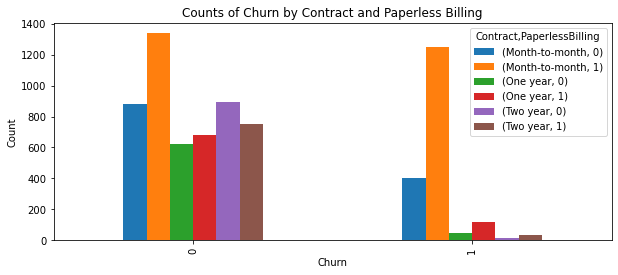

In [22]:
pivot_table = pd.crosstab(index = data['Churn'], columns = [data['Contract'], data['PaperlessBilling']])

pivot_table.plot(kind = 'bar', figsize=(10, 4))

plt.title('Counts of Churn by Contract and Paperless Billing')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

# 5.Plot Histogram

In [23]:
a=data[['tenure']]

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

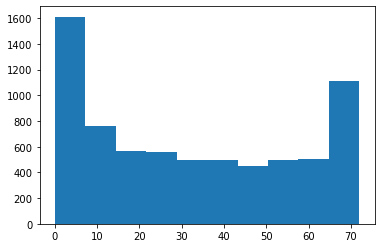

In [24]:
plt.hist(a)

# Histogram of Tenure

### OR

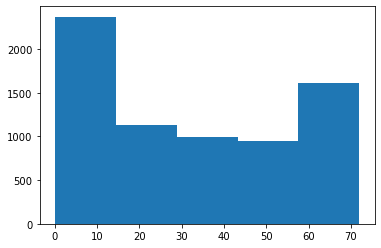

In [25]:
plt.hist(data['tenure'], 5);

In [26]:
b=data[['TotalCharges']]

(array([2702., 1226.,  685.,  503.,  460.,  414.,  395.,  312.,  224.,
         122.]),
 array([   0. ,  868.4, 1736.8, 2605.2, 3473.6, 4342. , 5210.4, 6078.8,
        6947.2, 7815.6, 8684. ]),
 <BarContainer object of 10 artists>)

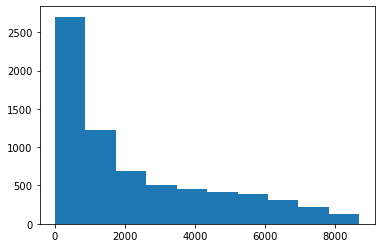

In [27]:
plt.hist(b)

# Histogram of TotalCharges

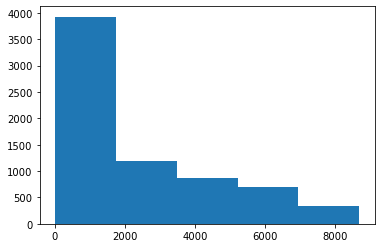

In [28]:
plt.hist(data['TotalCharges'], 5);

In [29]:
c=data[['MonthlyCharges']]

(array([1606.,  189.,  360.,  634.,  473.,  874.,  954.,  864.,  759.,
         330.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

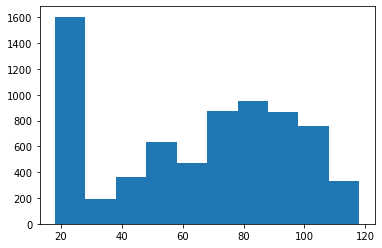

In [30]:
plt.hist(c)

# Histogram of MonthlyCharges

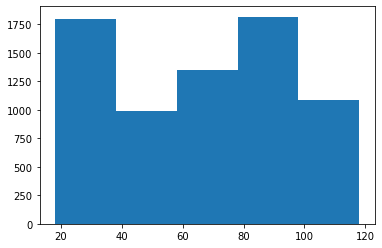

In [31]:
plt.hist(data['MonthlyCharges'], 5);

# 6.Display Density plot

# Display density plot for TotalCharges vs Churn(Yes/No)

In [32]:
data_yes = data[data['Churn'] == 1]
data_no = data[data['Churn'] == 0]

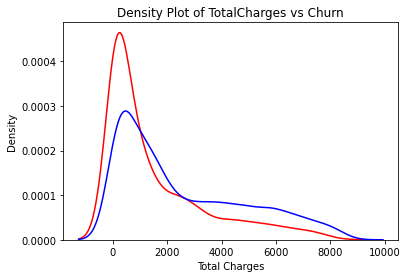

In [33]:
sns.kdeplot(data_yes['TotalCharges'], color='red', label='Yes')
sns.kdeplot(data_no['TotalCharges'], color='blue', label='No')

plt.title('Density Plot of TotalCharges vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Density')

plt.show()

# Display density plot for MonthlyCharges vs Churn(Yes/No)¶

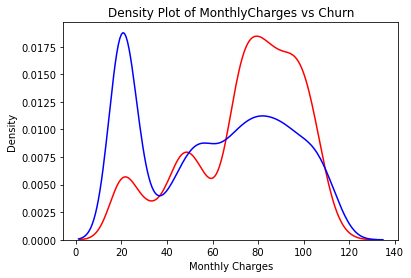

In [38]:
sns.kdeplot(data_yes['MonthlyCharges'], color='red', label='Yes')
sns.kdeplot(data_no['MonthlyCharges'], color='blue', label='No')

plt.title('Density Plot of MonthlyCharges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

plt.show()